# Linear Regression

In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import lxml
sns.set_theme()
sns.set(rc={'figure.figsize':(15, 9)})
sns.set(font_scale=1.5) 

### Load Data

The `world_happiness.csv` dataset from the `data` folder contains a series of variables that can be used as a proxy to a country's evaluation of its own goodness of life. The `happiness_score` metric tries to summarise how "happy" each country is.

In [3]:
happy = pd.read_csv('C:/Users/USER/python/HOMEWORK/data/world_happiness.csv')
happy.head()


,country,social_support,freedom,corruption,generosity,gdp_per_cap,life_exp,happiness_score
0,Finland,2.0,5.0,4.0,47.0,42400,81.8,155
1,Denmark,4.0,6.0,3.0,22.0,48300,81.0,154
2,Norway,3.0,3.0,8.0,11.0,66300,82.6,153
3,Iceland,1.0,7.0,45.0,3.0,47900,83.0,152
4,Netherlands,15.0,19.0,12.0,7.0,50500,81.8,151


In [4]:
happy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          143 non-null    object 
 1   social_support   142 non-null    float64
 2   freedom          142 non-null    float64
 3   corruption       135 non-null    float64
 4   generosity       142 non-null    float64
 5   gdp_per_cap      143 non-null    int64  
 6   life_exp         143 non-null    float64
 7   happiness_score  143 non-null    int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 9.1+ KB


In [5]:
happy.describe()

,social_support,freedom,corruption,generosity,gdp_per_cap,life_exp,happiness_score
count,142.000000,142.000000,135.000000,142.00000,143.000000,143.000000,143.000000
mean,77.352113,77.000000,73.244444,78.78169,20124.286713,73.796503,77.643357
std,45.743379,45.569058,42.237507,44.87921,20570.547556,7.092194,46.377418
min,1.000000,1.000000,1.000000,1.00000,631.000000,52.900000,0.000000
25%,37.250000,37.500000,37.500000,41.25000,4110.000000,69.100000,36.500000
50%,76.000000,75.500000,74.000000,80.50000,13000.000000,74.900000,79.000000
75%,116.750000,116.750000,109.500000,116.75000,29750.000000,79.650000,118.000000
max,155.000000,155.000000,148.000000,155.00000,113000.000000,85.100000,155.000000


5. Using a histogram, plot the distribution of the `happiness_score` variable 


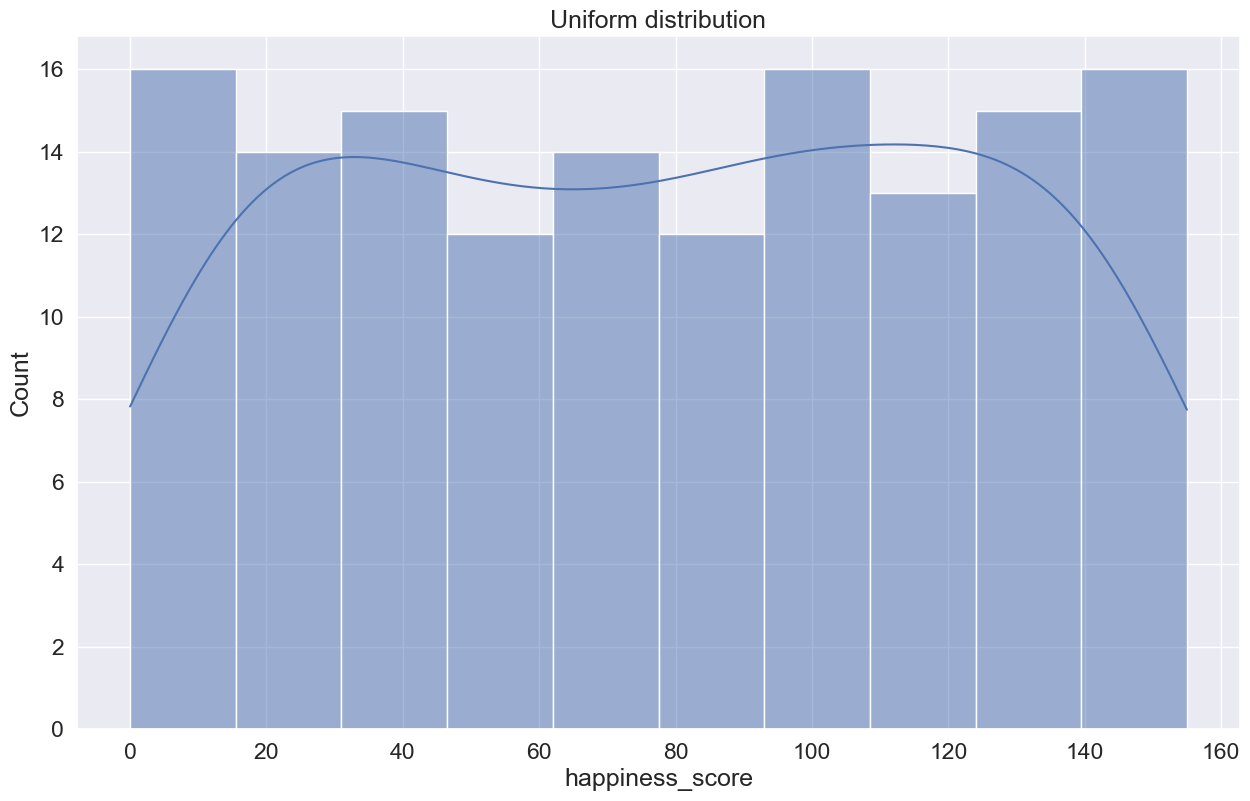

In [6]:
sns.histplot(x='happiness_score', data=happy, bins=10, kde=True)
plt.title('Uniform distribution')
plt.show()

6. Plot a correlation matrix (or a correlation heatmap) between all the numeric variables in the dataset. **Which variable is the least correlated with the `happiness_score` metric?** 

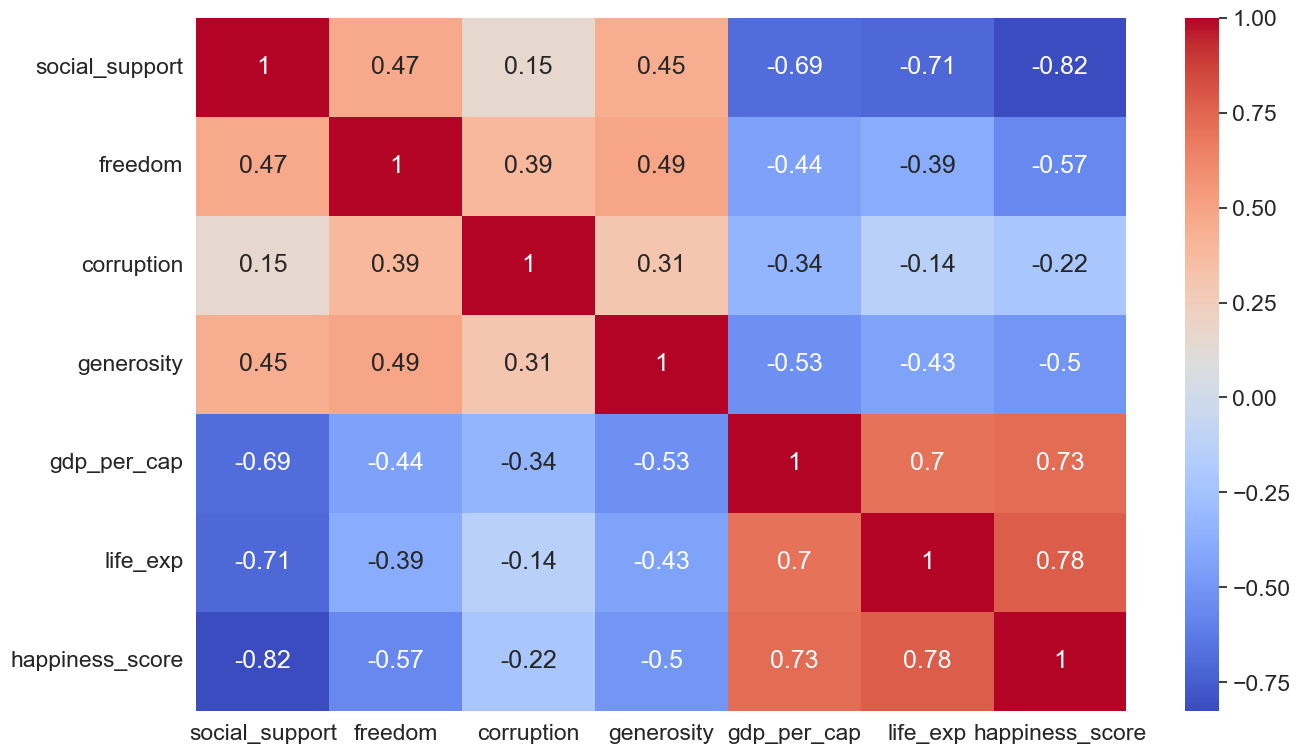

In [7]:
# Create correlation matrix
corr_matrix = happy.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [8]:
least_correlated = happy.corr()['happiness_score'].sort_values().head(1).index[0]

print(least_correlated)

social_support


7. You may have noticed that the `corruption` metric has some missing values. **How many countries have a missing corruption value?** After you've answered the question, replace all missing values *in all columns of the DataFrame* with the *respective column's mean value*. 

In [9]:
#I'm performing a check on the missing records in the 'corruption' variable.
happy['corruption'].isnull().sum()

8

In [11]:
#To replace the missing values in the 'corruption' column with the mean of the column.
happy['corruption'].fillna(happy['corruption'].mean(), inplace=True)
happy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          143 non-null    object 
 1   social_support   142 non-null    float64
 2   freedom          142 non-null    float64
 3   corruption       143 non-null    float64
 4   generosity       142 non-null    float64
 5   gdp_per_cap      143 non-null    int64  
 6   life_exp         143 non-null    float64
 7   happiness_score  143 non-null    int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 9.1+ KB


8. Use the `statsmodel` package to create a linear regression model where you use `life_exp` to predict the `happiness_score`. After [refreshing your memory on how to interpret a regression coefficient](https://statisticsbyjim.com/regression/interpret-coefficients-p-values-regression/#:~:text=The%20coefficient%20value%20signifies%20how,in%20isolation%20from%20the%20others.), answer the following question: given the model you just created, **a 1-year increase in life expectancy corresponds to an increase of how many points of the happiness score variable?**. 

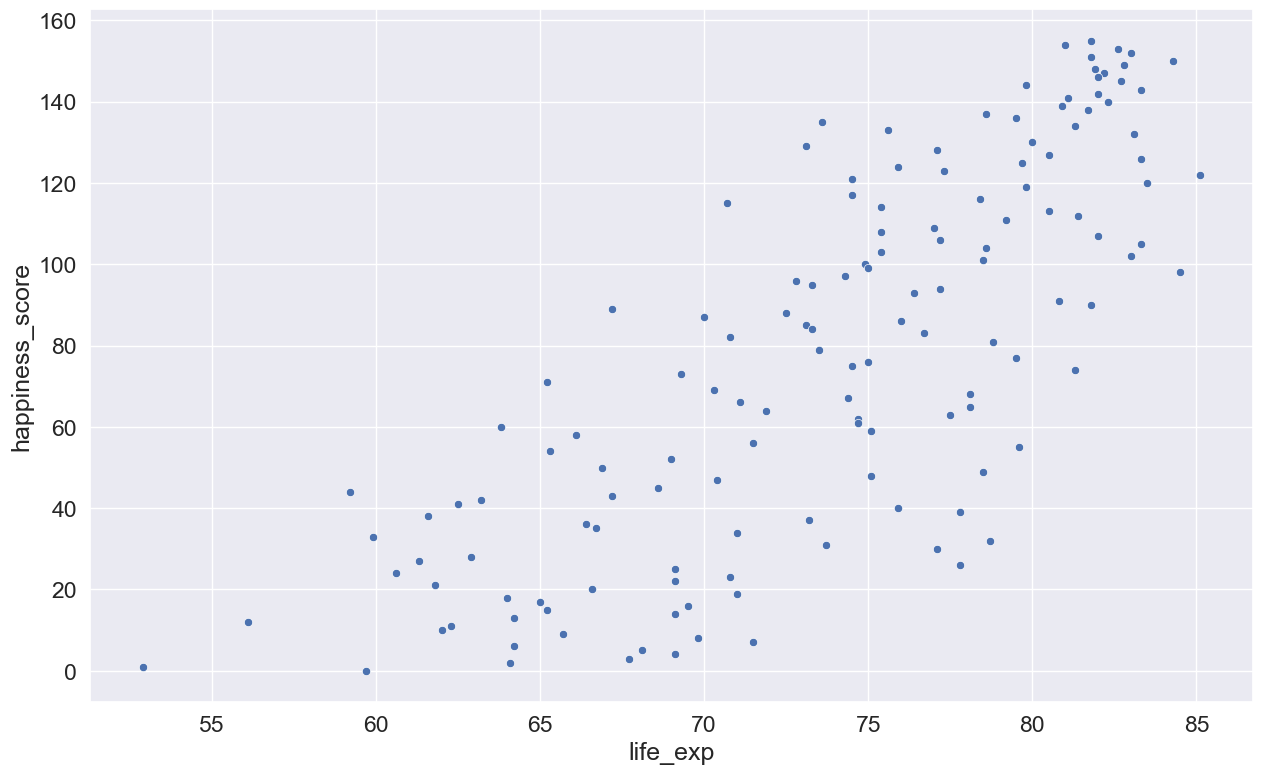

In [12]:
sns.scatterplot(x='life_exp', y='happiness_score', data=happy)
plt.show()

In [13]:
correl = happy.life_exp.corr(happy.happiness_score)
print('Correlation coefficient between X and Y:', round(correl, 2))

Correlation coefficient between X and Y: 0.78


In [14]:
import statsmodels.api as sm
Y = happy['happiness_score']
X = happy['life_exp']
X = sm.add_constant(data=X)  
model = sm.OLS(endog=Y,exog=X)
results = model.fit()

In [15]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        happiness_score   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     219.4
Date:                Mon, 29 May 2023   Prob (F-statistic):           1.59e-30
Time:                        18:15:59   Log-Likelihood:                -683.97
No. Observations:                 143   AIC:                             1372.
Df Residuals:                     141   BIC:                             1378.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -298.8710     25.536    -11.704      0.000    -349.355    -248.387
life_exp       5.1021      0.344     14.812      0.000       4.421       5.783
==============================================================================
Omnibus:                        7.539   Durbin-Watson:                   1.234
Prob(Omnibus):                  0.023   Jarque-Bera (JB):                6.120
Skew:                          -0.408   Prob(JB):                       0.0469
Kurtosis:                       2.400   Cond. No.                         778.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
results_as_html = results.summary().tables[1].as_html()
results_happy = pd.read_html(results_as_html, header=0, index_col=0)[0]

intercept, slope = results_happy['coef'][0], results_happy['coef'][1]

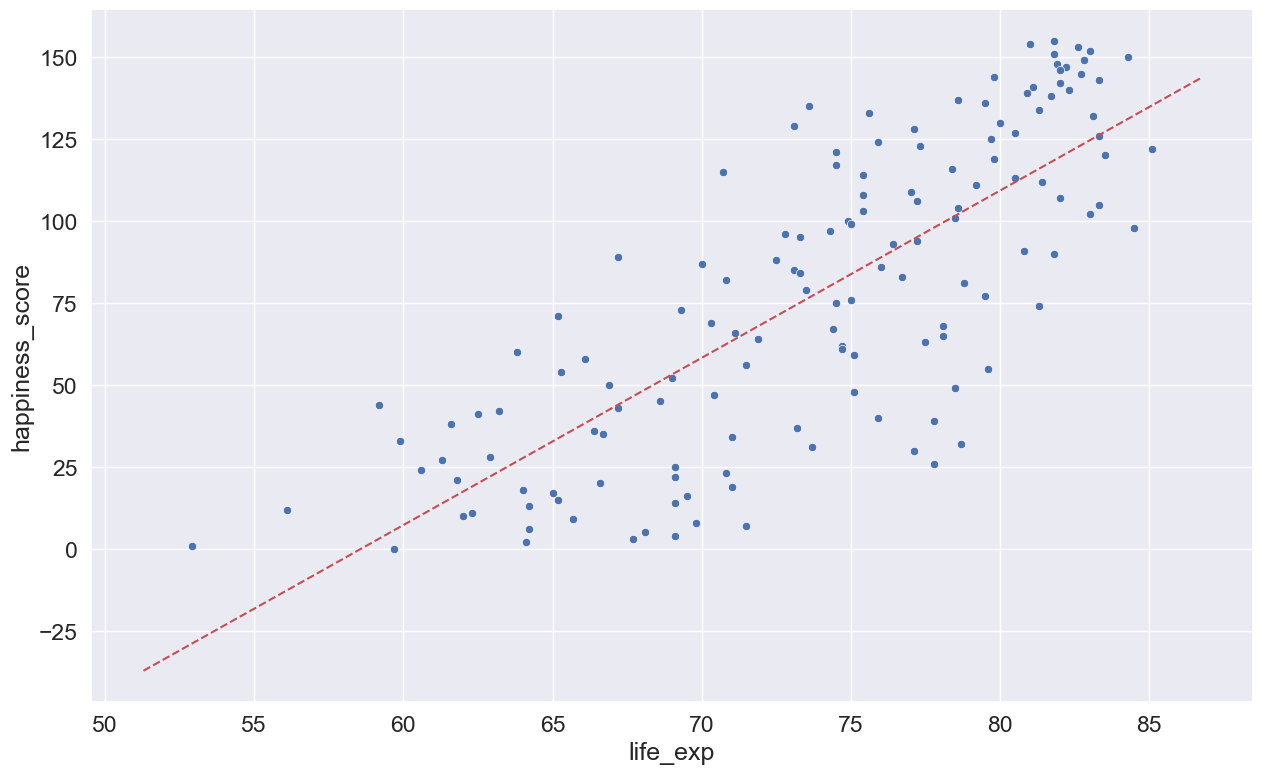

In [17]:
# plot the data points using a scatter plot
sns.scatterplot(x='life_exp', y='happiness_score', data=happy)

axes = plt.gca()   # get axes instance of current figure
x_vals = np.array(axes.get_xlim())   # get x-axis limits
y_vals = intercept + (slope * x_vals)   # define the equation of the regression line
plt.plot(x_vals, y_vals, '--', color='r')   # draw the regression line on top of the scatter plot
plt.show()

In [18]:
pred1 = results.predict(np.array([1, 80]))
pred2 = results.predict(np.array([1, 81]))
print('1 increase in life_exp corresponds to an increase of how many points of the happiness score variable is:', round(pred2[0], 3)-round(pred1[0], 3))

1 increase in life_exp corresponds to an increase of how many points of the happiness score variable is: 5.102000000000004


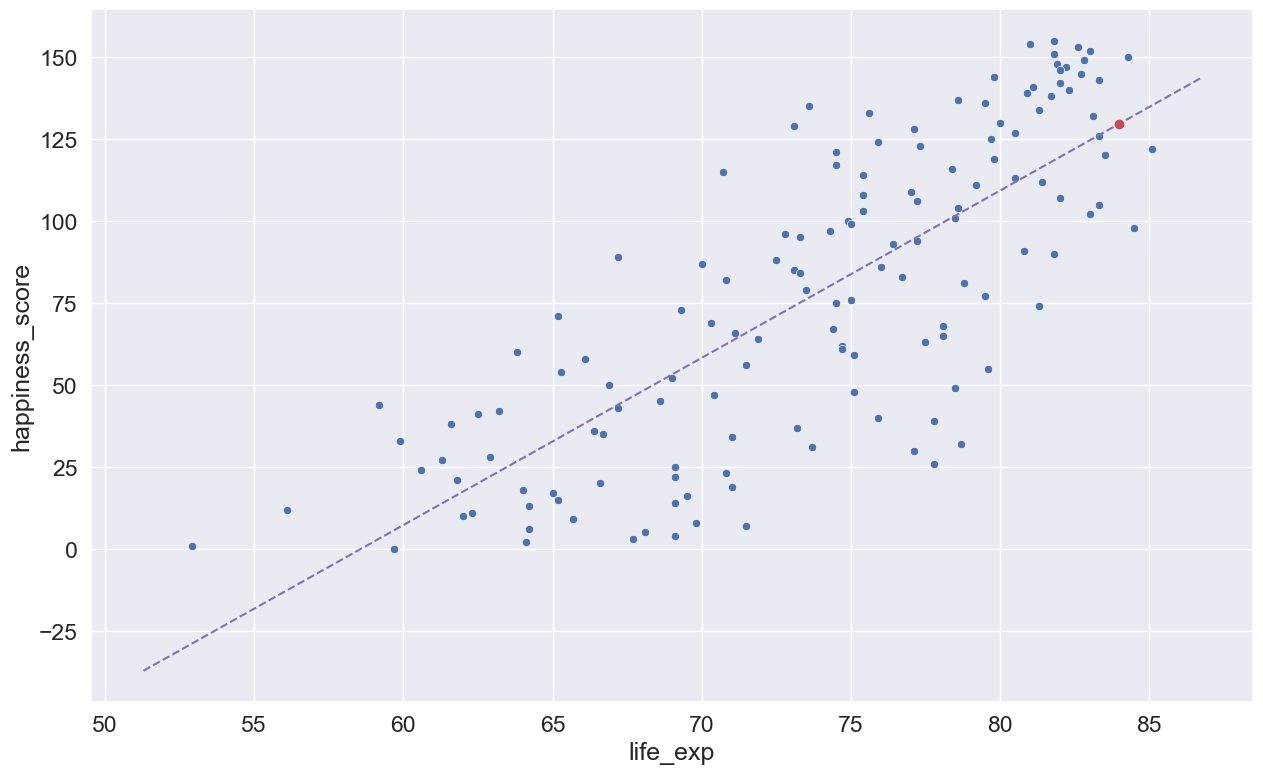

In [19]:

sns.scatterplot(x='life_exp', y='happiness_score', data=happy)
axes = plt.gca()  
x_vals = np.array(axes.get_xlim())   
y_vals = intercept + slope * x_vals  
plt.plot(x_vals, y_vals, '--', color='m')  
plt.plot(84, results.predict(np.array([1, 84]))[0], 'ro')
plt.show()

In [20]:
#Generate new  random obs
new_happiness_score = np.random.randint(55,85,10)
new_happiness_score

array([73, 57, 78, 80, 63, 75, 79, 79, 71, 60])

In [21]:
#Generate new prediction
results.predict(np.column_stack((np.ones(10), new_happiness_score)))

array([ 73.579546  ,  -8.05345448,  99.08985865, 109.29398371,
        22.5589207 ,  83.78367106, 104.19192118, 104.19192118,
        63.37542094,   7.25273311])

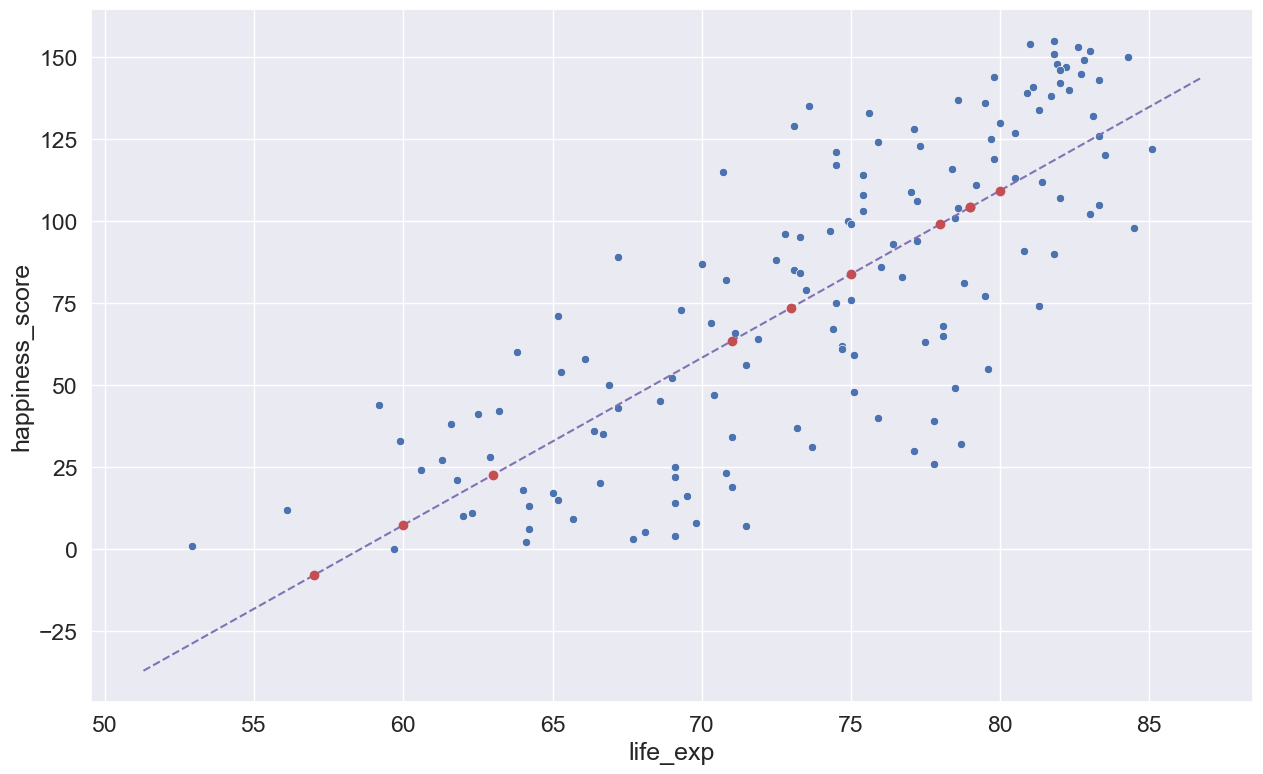

In [22]:
# plot the original dataset
sns.scatterplot(x='life_exp', y='happiness_score', data=happy)

# plot the regression line
axes = plt.gca()   
x_vals = np.array(axes.get_xlim())   
y_vals = intercept + slope * x_vals  
plt.plot(x_vals, y_vals, '--', color='m')   

# plot the new observed x-values and the relative predictions
for x, y in zip(new_happiness_score, results.predict(np.column_stack((np.ones(10), new_happiness_score)))): 
    plt.plot(x, y, 'ro')

plt.show()